# Project: Investigate a No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Investigate a dataset contains data from 100k medical appointments in Brazil, which is shows whether or not patients show up for their appointment. This dataset contains number of variables about the patient. Here we will explore the data and show the relation between other variables and no show up. Below some questions we will answer it during our analysis to gain some information about our data:

- Dose patient with critical deseas more likely to show up for their appointment?
- What are the characteristics of patients who show up to their appointment?
- Does the number of no-shows lower in patients with critical diseases?
- There are patients with more than one time no show?
- Does the time difference between scheduled day and appointment day affect the number of show-up?


In [1]:
#import statements for all of the packages used in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section we will load the dataset and process the data to use it.


In [2]:
# Load the dataset 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here there are not any null values

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### we can know from this statistic, 
- the maximum 'Age' of patient is 115 and the minimum is less than 1 year. the mean is 37 years.
- And 'Age', 'Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism', and 'SMS_received' are boolean values 
- the maximum value for 'Handcap' is 4


### Variable Identification
In this dataset Predictor (Input) variables are ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'] and Target (output) variable is ['No-show']

In [5]:
#number of samples in dataset, number of columns
df.shape

(110527, 14)

In [6]:
#duplicate rows in each dataset
len(df[df.duplicated() ==  True])

0

#### There is no duplicate rows in our dataset

In [7]:
#data types of data
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# number of non-null unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Data Cleaning

### Cleaning Column Labels
We don't need to rename the columns but change to lowercase to be easier to work with.

In [9]:
# replace spaces with underscores and lowercase labels
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Drop Extraneous Columns

In [10]:
df.drop(['appointmentid'], axis=1, inplace=True)

# confirm changes
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Fixing Data Types
change data types for ['ScheduledDay', 'ppointmentDay'] to be able to use it for statistc and plot.

In [11]:
# convert the 'scheduledday' and 'appointmentday' columns to datetime format
df['scheduledday'] = df['scheduledday'].astype('datetime64[ns]')
df['appointmentday'] = df['appointmentday'].astype('datetime64[ns]')

# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
patientid         110527 non-null float64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Dose patient with critical deseas more likely to show up for their appointment?

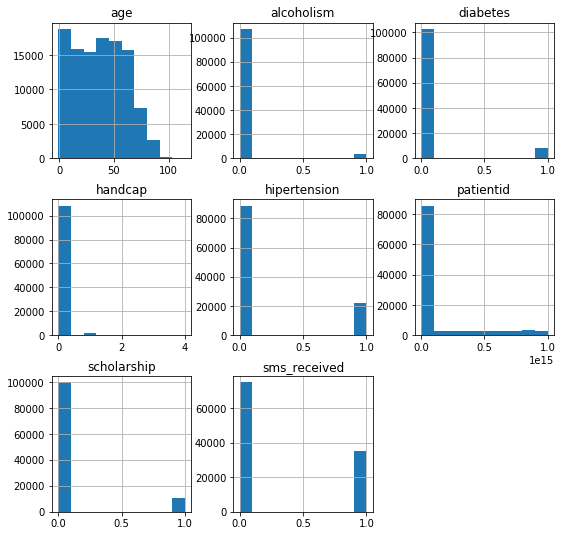

In [12]:
df.hist(figsize=(9,9));

### What are the characteristics of patients who show up to their appointment?

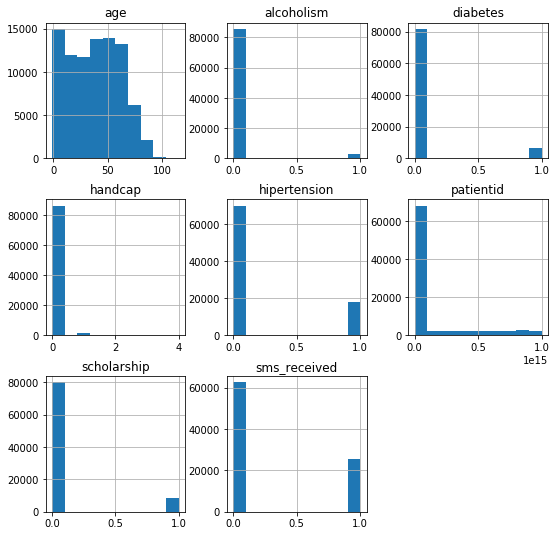

In [13]:
#in 'no-show' column "No" for patient who show up
#Plotting characteristics for patients who show up
yes = df['no-show'] == 'No'
df[yes].hist(figsize=(9,9));

> We can see the characteristics for patient who show up in this histograme, where the age of patients were between 0 to 100, but the average was about 50 year old.
also most of patients hadn't deases, and more than 50% of them didn't recive sms.

In [14]:
#age groups for patients who show up
df[yes].groupby('age')['no-show'].count()

age
-1         1
 0      2900
 1      1858
 2      1366
 3      1236
        ... 
 98        5
 99        1
 100       4
 102       2
 115       2
Name: no-show, Length: 104, dtype: int64

In [15]:
#age groups for patients who haven't show up
no = df['no-show'] == 'Yes'

df[no].groupby('age')['no-show'].count()

age
0      639
1      415
2      252
3      277
4      282
      ... 
95       6
96       1
97       2
98       1
115      3
Name: no-show, Length: 100, dtype: int64

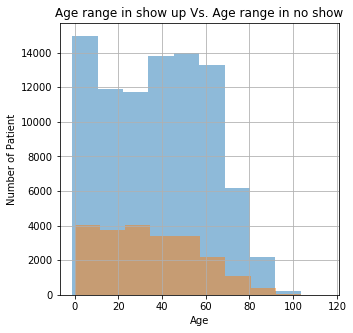

In [16]:
df[yes]['age'].hist(alpha= 0.5, figsize=(5,5))
df[no]['age'].hist(alpha= 0.5, figsize=(5,5))
plt.title("Age range in show up Vs. Age range in no show")
plt.xlabel("Age")
plt.ylabel("Number of Patient");

In [17]:
#age groups for all patients
df.groupby('age')['no-show'].count()

age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: no-show, Length: 104, dtype: int64

> As we can tell in first query, younger patients are more likely to show up. But when we show the overall statistic 
we can see the number of younger patients are greater than the number of older patients.

### Does the number of no-shows lower in patients with critical diseases?

In [18]:
# number of show up patients with diabetes (1430)
df[no].groupby('diabetes')['no-show'].count()

diabetes
0    20889
1     1430
Name: no-show, dtype: int64

In [19]:
#number of no show up patients with diabetes (6513)
df[yes].groupby('diabetes')['no-show'].count()

diabetes
0    81695
1     6513
Name: no-show, dtype: int64

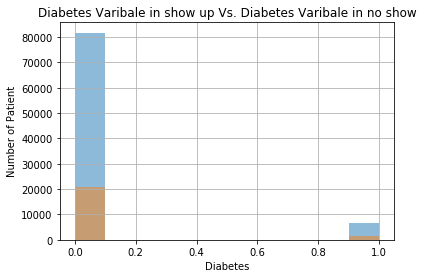

In [20]:
df[yes]['diabetes'].hist(alpha=0.5)
df[no]['diabetes'].hist(alpha=0.5)
plt.title("Diabetes Varibale in show up Vs. Diabetes Varibale in no show")
plt.xlabel("Diabetes")
plt.ylabel("Number of Patient");

> Number of No-show in patients with diabetes greater than the number of show up.

In [21]:
#Number of show up (Alcoholism)
df[yes].groupby('alcoholism')['no-show'].count()

alcoholism
0    85525
1     2683
Name: no-show, dtype: int64

In [22]:
#Number of no show (Alcoholism)
df[no].groupby('alcoholism')['no-show'].count()

alcoholism
0    21642
1      677
Name: no-show, dtype: int64

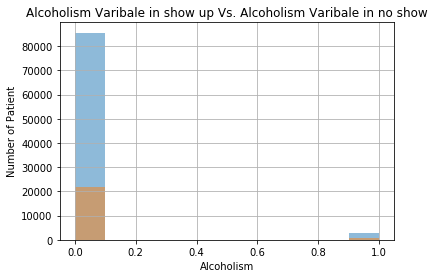

In [23]:
df[yes]['alcoholism'].hist(alpha=0.5)
df[no]['alcoholism'].hist(alpha=0.5)
plt.title("Alcoholism Varibale in show up Vs. Alcoholism Varibale in no show")
plt.xlabel("Alcoholism")
plt.ylabel("Number of Patient");

> Number of No-show in patients deal with alcoholism lower than the number of show up.

In [24]:
#Number of no show (hipertension)
df[no].groupby('hipertension')['no-show'].count()[1] / len(df[no])

0.16900398763385457

In [25]:
#Number of show up(hipertension)
df[yes].groupby('hipertension')['no-show'].count()[1] / len(df[yes])

0.20439189189189189

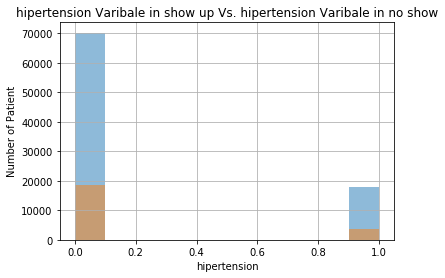

In [26]:
df[yes]['hipertension'].hist(alpha=0.5)
df[no]['hipertension'].hist(alpha=0.5)
plt.title("hipertension Varibale in show up Vs. hipertension Varibale in no show")
plt.xlabel("hipertension")
plt.ylabel("Number of Patient");

> Patients with diseases more likely to show up. As in 'hipertension' the percent of show up is 20% compared to No show which is 16%.

### There are patients with more than one time no show?

In [27]:
# the number of no-show by patient
df[no].groupby('patientid')['no-show'].count().sort_values(ascending=False)

patientid
1.421987e+12    18
5.635135e+14    16
5.587790e+12    15
5.811973e+14    14
6.575144e+13    13
                ..
6.425180e+13     1
6.424624e+13     1
6.423924e+13     1
6.422124e+13     1
5.628261e+06     1
Name: no-show, Length: 17663, dtype: int64

> Looking at the number of no-show among patients, Patients with more than one no-show are more likely to not showing to thier appointment

### Does the time difference between scheduled day and appointment day affect the number of show-up?

In [28]:
#count how many day between schedule day and appointment day
df['time'] = (df['appointmentday'] - df['scheduledday']).dt.days
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,time
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


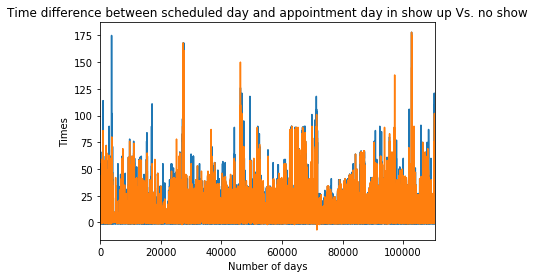

In [29]:
df[yes].time.plot()
df[no].time.plot()
plt.title("Time difference between scheduled day and appointment day in show up Vs. no show")
plt.xlabel("Number of days")
plt.ylabel("Times");

In [30]:
df[no].groupby('time')['no-show'].count() / df.groupby('time')['no-show'].count()

time
-7      1.000000
-2      1.000000
-1      0.046469
 0      0.213505
 1      0.238216
          ...   
 154    0.600000
 161    0.181818
 168    0.125000
 175    0.375000
 178    0.200000
Name: no-show, Length: 131, dtype: float64

In [31]:
df[yes].groupby('time')['no-show'].count() / df.groupby('time')['no-show'].count()

time
-7           NaN
-2           NaN
-1      0.953531
 0      0.786495
 1      0.761784
          ...   
 154    0.400000
 161    0.818182
 168    0.875000
 175    0.625000
 178    0.800000
Name: no-show, Length: 131, dtype: float64

In [32]:
df[yes].time.mean()

7.754659441320515

In [33]:
df[no].time.mean()

14.83148886598862

> the average time difference between schedule day and appointment day in no-show is 15 days and in show up is 8 days

<a id='conclusions'></a>
## Conclusions

In this report, we investigate a No-show appointments Dataset which contains independent variables ( 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes','Alcoholism', 'Handcap', 'MS_received') and dependent variabl ('No-show'). 

The results show that there was a high percentage of show up among patients with diseases. Also, Patients with more than one no-show are more likely to not show up for their appointment. In addition, the average time difference between schedule day and appointment day was about 15 days in no show compared to 8 days in show up.

#### Limitations

the data about patient's location was not that helpful, because we need to know how far the clinic from their home to be more accurate if the distance effect the output or not. also the number of no-show wasn't big, if the size of dataset was big enough we will be more accurate about the reasons why the patients tend to no show to thier appointment. 